Marjum Pass, Oct 14-15 night. On the ground, ~30m baseline EW.

Inputs:

0: bicone + 2 amps + 90 MHz LPF

1: discone + 2 amps + 90 MHz LPF

2, 3: tentpole + FEM + PAM

4, 5: vivaldi + FEM + PAM

SNAP: C000091 (10.10.10.13)

In [2]:
from datetime import datetime
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from eigsep_corr import io
%matplotlib inline

In [55]:
DATA_DIR = "/home/christian/Documents/research/eigsep/eigsep_corr/eigsep_corr/data/"
files = sorted(glob(os.path.join(DATA_DIR, "20231015_1[6-7]*")), key=os.path.getctime)[5:]

In [56]:
h, f = io.read_file(files[0])
PAIRS = h["pairs"]
N_ACC = len(h["acc_cnt"])
ACC_BINS = h["acc_bins"]
NCHAN = h["nchan"]

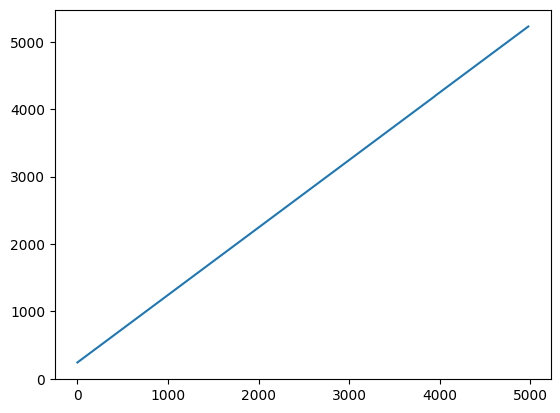

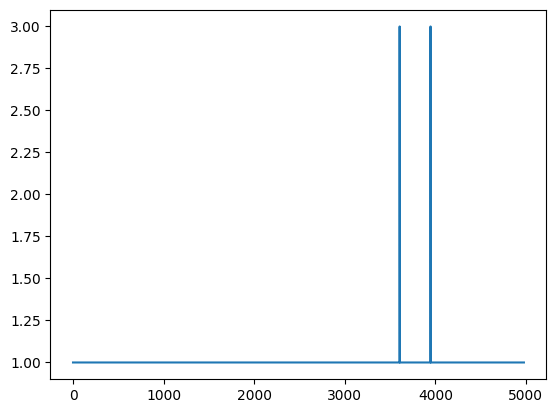

In [57]:
acc_cnts = []
for f in files:
    acc_cnts.extend(io.read_file(f)[0]["acc_cnt"])

plt.figure()
plt.plot(acc_cnts)
plt.show()

plt.figure()
plt.plot(np.diff(acc_cnts))
plt.show()

In [58]:
autos = [p for p in PAIRS if len(p) == 1]
crosses = [p for p in PAIRS if len(p) == 2]
print(autos, crosses)
dauto = {}
dcross = {}
for pair in autos:
    d = np.empty((len(files), N_ACC, ACC_BINS, NCHAN))
    for i, f in enumerate(files):
        d[i] = io.read_file(f)[1][pair][..., 0]
    dauto[pair] = d
for pair in crosses:
    d = np.empty((len(files), N_ACC, ACC_BINS, NCHAN, 2))
    for i, f in enumerate(files):
        d[i] = io.read_file(f)[1][pair]
    dcross[pair] = d

['0', '1', '2', '3', '4', '5'] ['02', '04', '24', '13', '15', '35']


## Autos

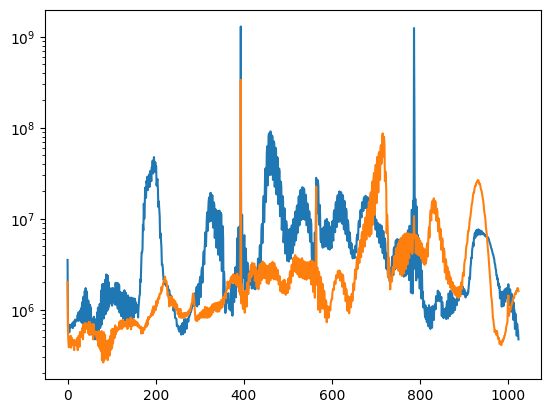

In [59]:
plt.figure()
plt.plot(dauto["2"][0, 0, 0])
plt.plot(dauto["4"][0, 0, 0])
plt.yscale("log")
plt.show()

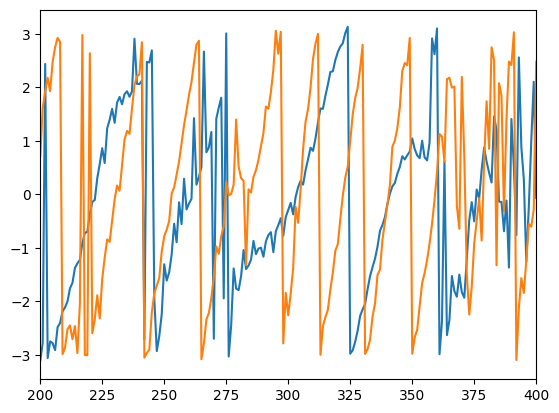

In [61]:
re1 = dcross["24"][0, 0, 0, :, 0]
im1 = dcross["24"][0, 0, 0, :, 1]
phase1 = np.arctan2(im1, re1)
re2 = dcross["24"][50, 0, 0, :, 0]
im2 = dcross["24"][50, 0, 0, :, 1]
phase2 = np.arctan2(im2, re2)
plt.figure()
plt.plot(phase1)
plt.plot(phase2)
plt.xlim(200, 400)
plt.show()

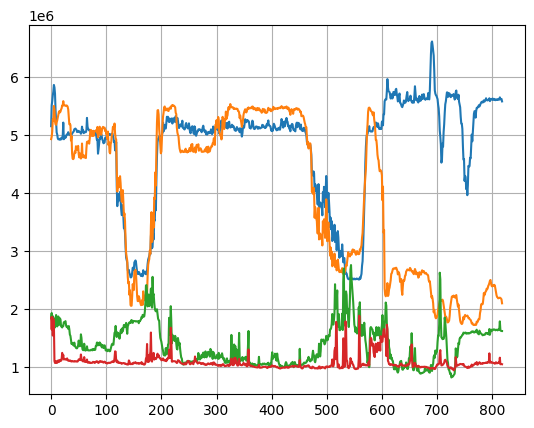

In [83]:
chan = 600
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True)
plt.sca(axs)
plt.plot(dauto_stack["2"][:, chan])
plt.plot(dauto_stack["3"][:, chan])
plt.plot(dauto_stack["4"][:, chan])
plt.plot(dauto_stack["5"][:, chan])
#plt.xlim(500, 700)
plt.grid()
plt.show()

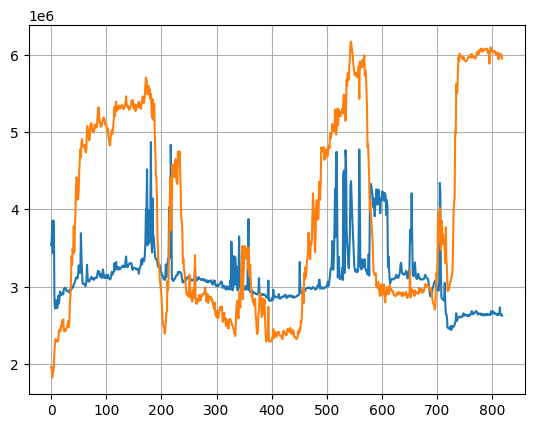

In [85]:
chan = 500
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True)
plt.sca(axs)
# plt.plot(dauto_stack["2"][:, chan])
# plt.plot(dauto_stack["3"][:, chan])
plt.plot(dauto_stack["4"][:, chan])
plt.plot(dauto_stack["5"][:, chan])
#plt.xlim(500, 700)
plt.grid()
plt.show()

## Cross

In [42]:
mag = {}
phase = {}
for k, v in dcross_stack.items():
    re = v[..., 0]
    im = v[..., 0]
    mag[k] = np.sqrt(re**2 + im**2)
    
    re -= re[:600].mean(axis=0, keepdims=True)
    im -= im[:600].mean(axis=0, keepdims=True)
    phase[k] = np.arctan2(im, re)

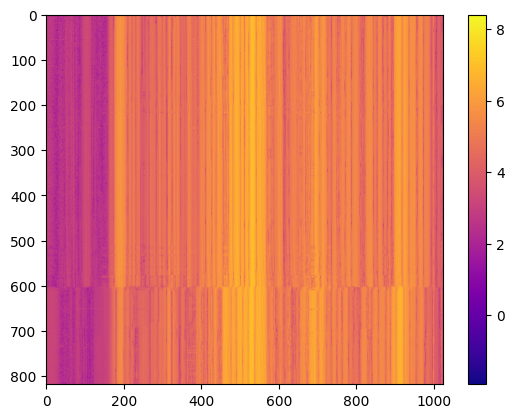

In [43]:
plt.figure()
plt.imshow(np.log10(mag["35"]), aspect="auto", cmap="plasma")
plt.colorbar()
plt.show()

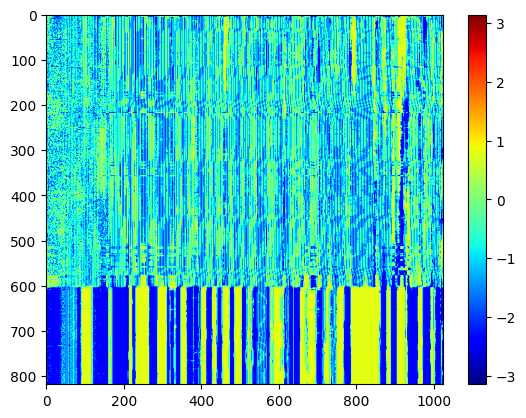

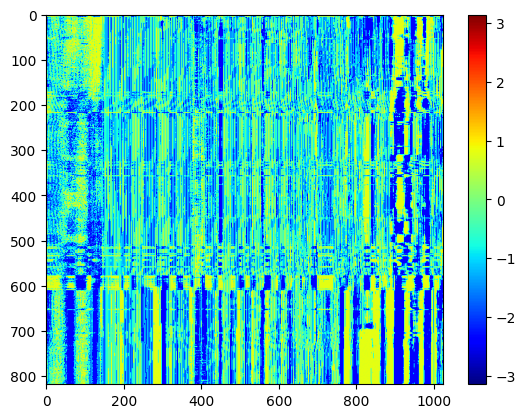

In [45]:
plt.figure()
plt.imshow(phase["35"], aspect="auto", cmap="jet", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(phase["24"], aspect="auto", cmap="jet", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()

In [46]:
dcross_stack["35"].shape

(819, 1024, 2)

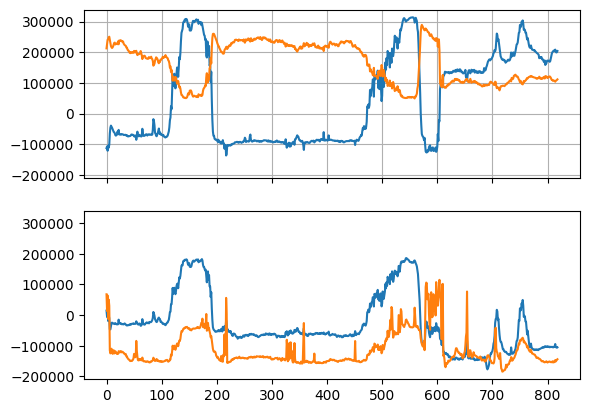

In [58]:
chan = 600
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.sca(axs[0])
plt.plot(dcross_stack["35"][:, chan, 0])
plt.plot(dcross_stack["35"][:, chan, 1])
#plt.xlim(500, 700)
plt.grid()

plt.sca(axs[1])
plt.plot(dcross_stack["24"][:, chan, 0])
plt.plot(dcross_stack["24"][:, chan, 1])
plt.show()

In [65]:
files[60]

'/home/christian/Documents/research/eigsep/eigsep_corr/eigsep_corr/data/20231014_191006.eig'

In [59]:
h = io.read_file(files[0])[0]
datetime.fromtimestamp(h["times"][0])

datetime.datetime(2023, 10, 14, 17, 18, 57, 689396)

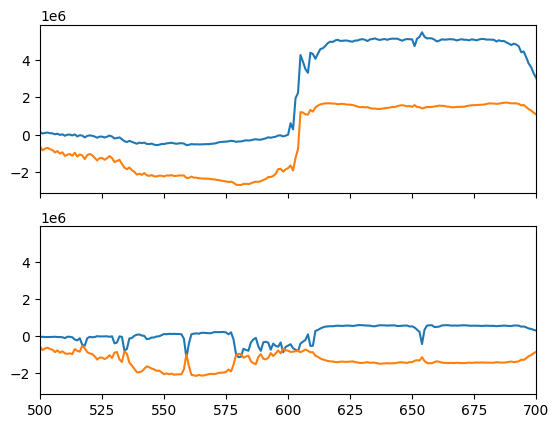

In [54]:
chan = 500
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.sca(axs[0])
plt.plot(dcross_stack["35"][:, chan, 0])
plt.plot(dcross_stack["35"][:, chan, 1])
plt.xlim(500, 700)


plt.sca(axs[1])
plt.plot(dcross_stack["24"][:, chan, 0])
plt.plot(dcross_stack["24"][:, chan, 1])
plt.show()